## Toogle on/off view

> Select to see only the results or with the code

In [1]:
# toogle view
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Import, dirs, .py

In [4]:
#directories
import os
try:
    parentdir
except NameError:
    parentdir=os.getcwd()
else:
    parentdir = parentdir
homedir=r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S101d14Feb17_60.5_635_A2_CuAzu655';#data directory
print('The working directory is parentdir: %s' %parentdir)
print('The data directory is homedir: %s' %homedir)

The working directory is parentdir: /home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/Azurin_SM_repo/Analysis
The data directory is homedir: /home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S101d14Feb17_60.5_635_A2_CuAzu655


In [5]:
#list of folders and their directories CuAZUATTO655
Analysis_dir = '/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/Azurin_SM_repo/Analysis'
data_dir = os.path.abspath('/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data')
S83d10Sept16_A3_30s = os.path.join(data_dir, 'AzurinATTO655/CuAzuATTO655/20160910_CuAzu655/S83d10Sept16_A3/30sec_trace')
os.path.isdir(S83d10Sept16_A3_30s)

True

In [75]:
# import modules
%load_ext autoreload
%autoreload 2
import sys
sys.path.append(Analysis_dir)
from LongTraceAnalysis import LongTraceClass
from simulation import *
from Analysis import *
from ChangePointProcess import *
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
df_datn_emplot = ListsPt3Hdf5(S83d10Sept16_A3_30s)
# df_datn_emplot.head(5)
df_datn_emplot.head()

,PointNumber,Potential,FileName,FilePathHdf5
0,24,50,Point_0.11uW_A3_50mV(14)_30s_24.pt3.hdf5,/home/biswajit/Research/Reports_ppt/reports/Az...
1,7,50,Point_0.11uW_A3_50mV(14)_30s_7.pt3.hdf5,/home/biswajit/Research/Reports_ppt/reports/Az...
2,23,50,Point_0.11uW_A3_50mV(14)_30s_23.pt3.hdf5,/home/biswajit/Research/Reports_ppt/reports/Az...
3,16,50,Point_0.11uW_A3_50mV(14)_30s_16.pt3.hdf5,/home/biswajit/Research/Reports_ppt/reports/Az...
4,14,50,Point_0.11uW_A3_50mV(14)_30s_14.pt3.hdf5,/home/biswajit/Research/Reports_ppt/reports/Az...


In [4]:
# pt3hdf5list = ListsPt3Hdf5(foldername=S81d7Sept16_A3_ON_60sec_trace)
FilePathHdf5 = '/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/AzurinATTO655/201702_S101toS104/S101d14Feb17_60.5_635_A2_CuAzu655/Point_A2_60.5__30s_1/data/Point_A2_000mV(7)_60.5__30s_1.pt3.hdf5'
folderpath = '/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/AzurinATTO655/201702_S101toS104/S101d14Feb17_60.5_635_A2_CuAzu655/Point_A2_60.5__30s_1/data'

## Figure Parameters

In [6]:
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.size"] = "14"

## File_list

Total number of files

In [23]:
data_path = '/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/AzurinATTO655';
pt3hdf5_extension = [".pt3.hdf5"];
pt3hdf5_file_list = [];
for dirpath, dirname, filenames in os.walk(data_path):
    for filename in [f for f in filenames if f.endswith(tuple(pt3hdf5_extension))]:
        file_path_pt3 = os.path.join(dirpath, filename);
        pt3hdf5_file_list = np.append(pt3hdf5_file_list, file_path_pt3);
print(len(pt3hdf5_file_list))

2362


## Change point processing

### Testing

With time_sect=50s for the 300s trace, execution time is 35 secs.

While with time_sect=100s, execution time 1min 50s.

While with time_sect=25s, execution time 22s.

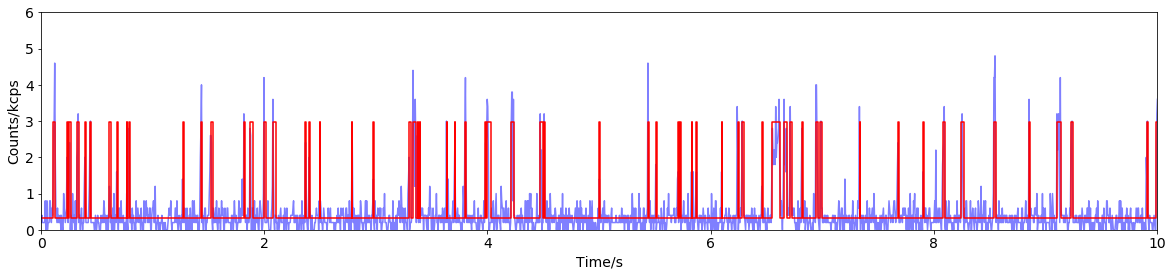

In [26]:
file_path_hdf5 = 'changepoint_program/Point_A2_060mV(16)_60.5__30s_1.hdf5';
file_path_hdf5 = os.path.abspath(file_path_hdf5);
hdf5_anal, timestamps, cp_out = changepoint_photonhdf5(file_path_hdf5, time_sect=25,
                                                     pars=(1, 0.1, 0.9, 2), overwrite=False)
plt.close('all')
fig = plt.figure(figsize=(20, 4))
nrows=1;ncols=1;
ax00 = plt.subplot2grid((nrows, ncols),(0,0))

plot_changepoint_trace(ax00, timestamps, cp_out, bintime=5e-3,
               x_lim_min=0, y_lim_min=0, x_lim_max=10, y_lim_max=6,
               show_changepoint=True);

*** Change point analysis both linux and windows give the same results.***

Parameters [1, 0.01, 0.99, 2] seems to give the best results

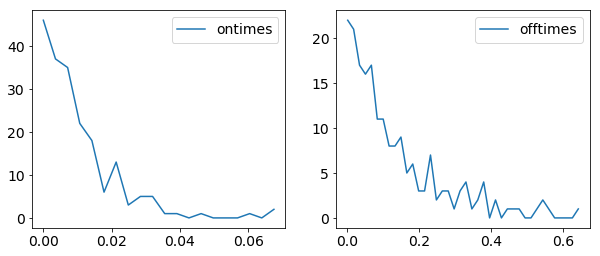

In [27]:
# on-off from changepoint
onoff_out = onoff_fromCP(cp_out, timestamps)
plt.close('all')
fig = plt.figure(figsize=(10, 4))
nrows=1;ncols=2;
ax00 = plt.subplot2grid((nrows, ncols),(0,0))
ax01 = plt.subplot2grid((nrows, ncols),(0,1))
n, t = np.histogram(onoff_out['ontimes'], bins=20)
ax00.plot(t[:-1], n, label='ontimes')
n, t = np.histogram(onoff_out['offtimes'], bins=40)
ax01.plot(t[:-1], n, label='offtimes')
ax00.legend()
ax01.legend()

In [37]:
# folderwise on/off cp_outputs
timetrace_output = cp_outputs_folderwise(folderpath=S83d10Sept16_A3_30s, pointnumbers=[1], potentialist=potentialist)
timetrace_output

Point_1                                                               \
  Potential       t_onav t_onaverr      t_offav t_offaverr       t_ratio   
0    -100.0  3.284803508   10.7864  1.154915831     5.1378   0.351593582   
1     -50.0  0.042412474    0.0159  0.203853338     0.0760   4.806447679   
2       0.0  0.062349839    0.0166  0.064081919     0.0170   1.027780027   
3      50.0  0.038549254    0.0118  0.133141539     0.0410   3.453803281   
4     100.0  0.007889745    0.0030  0.248519919     0.0940  31.499105458   

                 
     t_ratioerr  
0   1.944068610  
1   2.541219597  
2   0.386286610  
3   1.499631860  
4  16.893852665

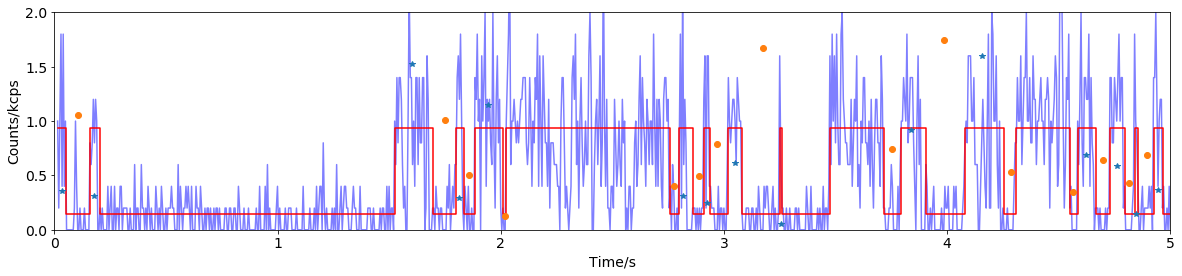

In [45]:
# comparision between timetrace-changepoint and on-off time
file_path_hdf5 = '/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/Azurin_SM_repo/Analysis/changepoint_program/cp_outcurrent/Point_0.11uW_A2_suba1_2_0mV_2.hdf5'
file_path_hdf5 = os.path.abspath(file_path_hdf5);
hdf5_anal, timestamps, cp_out = changepoint_photonhdf5(file_path_hdf5, time_sect=25,
                                                     pars=(1, 0.01, 0.99, 2), overwrite=False)

onoff_out = onoff_fromCP(cp_out, timestamps)
plt.close('all')
fig = plt.figure(figsize=(20, 4))
nrows=1;ncols=1;
ax00 = plt.subplot2grid((nrows, ncols),(0,0))
plot_changepoint_trace(ax00, timestamps, cp_out, bintime=5e-3,
               x_lim_min=0, y_lim_min=0, x_lim_max=5, y_lim_max=2,
               show_changepoint=True);
ax00.plot(onoff_out['abs_ontime'], 10*onoff_out['ontimes'], '*')
ax00.plot(onoff_out['abs_offtime'], 10*onoff_out['offtimes'], 'o')
# ax00.set_xlim(50, 60)
# df_on

*** With time_sect=100s and parameters: [1, 0.1, 0.9, 2], the processing was not finished even after 3 days.***

## Timetrace plot

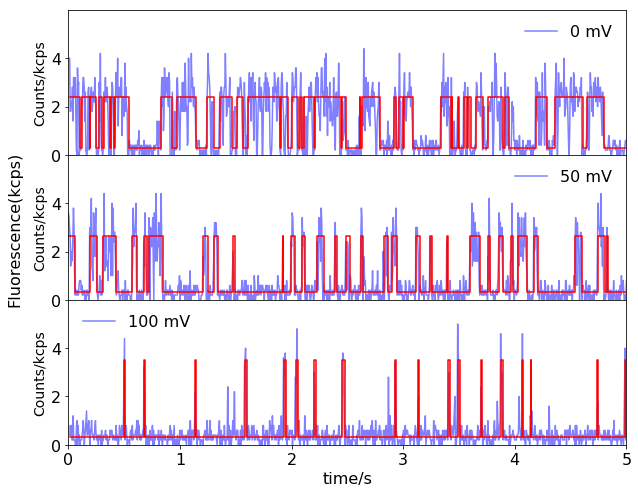

In [40]:
fig = timetraceplot_potentials(foldername=S83d10Sept16_A3_30s, input_potential=[0, 25, 50, 100],
                               pointnumbers=[1], x_lim_min=0, x_lim_max=5,
                               y_lim_min=0, y_lim_max=6, bintime=5e-3,
                               show_changepoint=True, figsize=(10, 8))

## Lifetime trace plot

In [48]:
# %run digitize_photons.py
df_dig = digitize_photonstamps(file_path_hdf5, pars=(1, 0.01, 0.99, 2),
                      bintime=5e-3, int_photon=True,
                      nanotimes_bool=True, real_countrate=True,
                      duration_cp=True)
df_dig.tail()

,timestamps,cp_no,state,nanotimes,countrate,duration_cp,int_photon
25748,59.992055253,327,1.0,5.591999978,1000.0,0.033355043,0.003452914
25749,59.993232425,327,1.0,6.687999973,1000.0,0.033355043,0.001177172
25750,59.994882455,327,1.0,5.815999977,1000.0,0.033355043,0.001650031
25751,59.994882780,327,1.0,12.823999949,1000.0,0.033355043,0.000000325
25752,59.995503967,327,1.0,4.791999981,1000.0,0.033355043,0.000621187


(0, 0.065952642547704776)

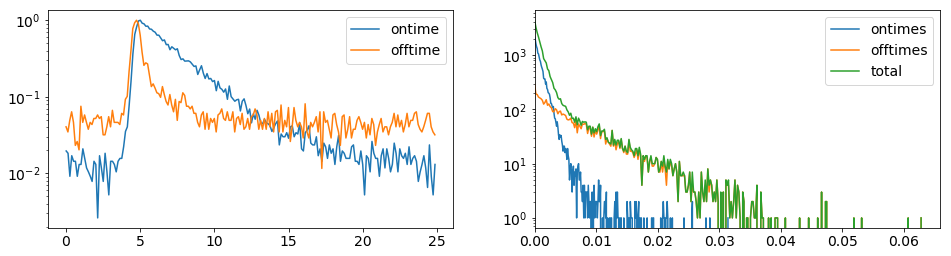

In [50]:
# interphoton and lifetime histogram of different states
df_on = df_dig[df_dig['state']==2].reset_index(drop=True)
df_off = df_dig[df_dig['state']==1].reset_index(drop=True)

#
fig = plt.figure(figsize=[16, 4])
nrows=1;ncols=2
ax00 = plt.subplot2grid((nrows,ncols), (0,0))
ax01 = plt.subplot2grid((nrows,ncols), (0,1))
# lifetime histogram
n, t = np.histogram(df_on['nanotimes'], bins=200)
ax00.plot(t[:-1], n/max(n), label='ontime');
n, t = np.histogram(df_off['nanotimes'], bins=200)
ax00.plot(t[:-1], n/max(n), label='offtime');
#interphoton
hist, bin_edges = np.histogram(df_on['int_photon'], bins=300);
ax01.plot(bin_edges[:-1], hist, label='ontimes')
hist, bin_edges = np.histogram(df_off['int_photon'], bins=300);
ax01.plot(bin_edges[:-1], hist, label='offtimes')
hist, bin_edges = np.histogram(df_dig['int_photon'], bins=300);
ax01.plot(bin_edges[:-1], hist, label='total')
ax00.legend()
ax01.legend()
ax00.set_yscale('log')
# ax01.set_xscale('log')
ax01.set_yscale('log')
ax01.set_xlim(0, None)

(0, 4000)

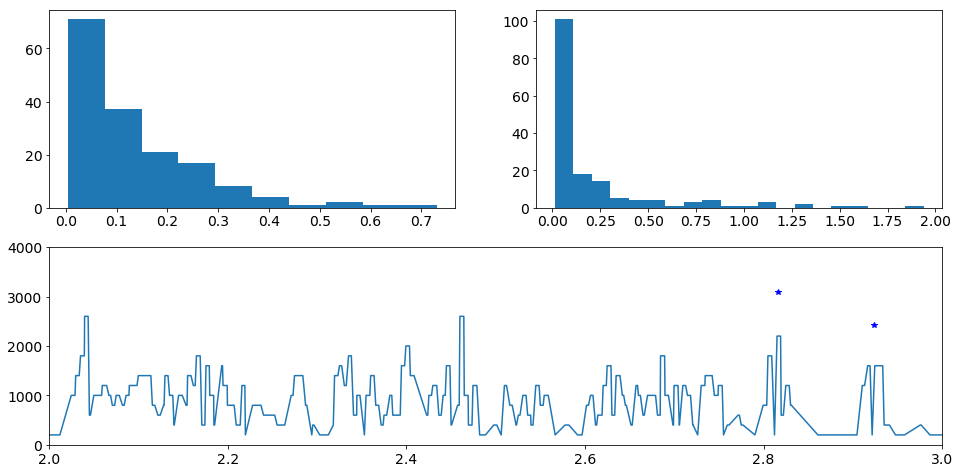

In [55]:
#
fig = plt.figure(figsize=[16, 8])
nrows=2;ncols=2
ax00 = plt.subplot2grid((nrows,ncols), (0,0))
ax01 = plt.subplot2grid((nrows,ncols), (0,1))
ax10 = plt.subplot2grid((nrows,ncols), (1,0), colspan=2)

df_on = df_dig[df_dig['state']==2].reset_index(drop=True)
df_off = df_dig[df_dig['state']==1].reset_index(drop=True)

time_left = df_on.groupby('cp_no').timestamps.min();
time_right = df_on.groupby('cp_no').timestamps.max();
abs_ontime = df_on.groupby('cp_no').timestamps.mean();
ontimes = time_right - time_left
ax00.hist(ontimes
         )

time_left = df_off.groupby('cp_no').timestamps.min();
time_right = df_off.groupby('cp_no').timestamps.max();
abs_offtime = df_off.groupby('cp_no').timestamps.mean();
offtimes = time_right - time_left
ax01.hist(offtimes, bins=20)


ax10.plot(abs_ontime, 1e5*ontimes, '*b')
ax10.plot(df_dig['timestamps'], df_dig['countrate'])
# ax10.plot(df_dig['timestamps'], df_dig['countrate_cp'])
ax10.set_xlim(2, 3)
ax10.set_ylim(0, 4000)

## FCS

### Calculate FCS

In [58]:
from pycorrelate import fcs_photonhdf5
file_path_hdf5 = '/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/Azurin_SM_repo/Analysis/changepoint_program/cp_outcurrent/Point_0.11uW_A2_suba1_2_0mV_2.hdf5';
out = fcs_photonhdf5(file_path_hdf5, tmin=None, tmax=None,
                                   t_fcsrange=[1e-6, 10], nbins=100,
                                   overwrite=False);
[file_path_hdf5analysis, fcs_out] = out
lag_time = fcs_out['lag_time'];
Gn = fcs_out['G(t)-1'];
fcs_fit_result = t_on_off_fromFCS(lag_time, Gn, bg_corr=True)
fcs_fit_result

{'A1': 1.1252874349409125,
 'A1_err': 0.016916267095411868,
 't_ac1': 0.041015751125844581,
 't_ac1_err': 0.0032767816935960958,
 'toff1': '0.0872',
 'toff1_err': '0.0070',
 'ton1': '0.0775',
 'ton1_err': '0.0062'}

$$C_1(t)=\frac{<I_{CW}(0)I_{CW}(t)> - <I_{CW}>^2}{<I_{CW}^2>-<I_{CW}>^2}$$

$$C_1(t) = A e^{\frac{-t}{\tau_{ac}}}$$

$$ \tau_{ac} = \frac{1}{k_{on}+k_{off}}$$
$$ C_1(0) = \frac{k_{on}}{k_{off}}$$

$$\tau_{off} = \tau_{ac}(1+C_1(0))$$

$$\tau_{on} = \tau_{ac}\Bigg(1+\frac{1}{C_1(0)}\Bigg)$$

{'toff1': '0.2848',
 'toff1_err': '0.0675',
 'toff2': '0.0161',
 'toff2_err': '0.0033',
 'ton1': '0.6167',
 'ton1_err': '0.1461',
 'ton2': '0.0284',
 'ton2_err': '0.0059'}

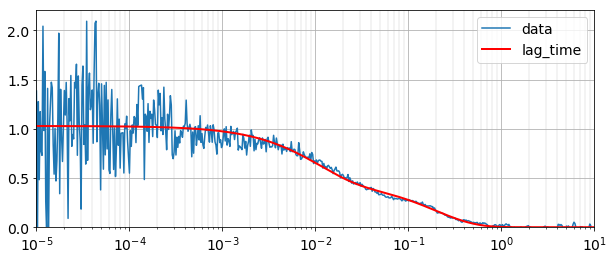

In [22]:
plt.close('all')
fig = plt.figure(figsize=(10, 4))
nrows=1;ncols=1;
ax00 = plt.subplot2grid((nrows, ncols),(0,0))
ax00.plot()
out = t_on_off_fromFCS(lag_time, Gn, tmin=1e-5, tmax=1.0e1,
                       fitype='bi_exp', bg_corr=False,
                       plotting=True, ax=ax00)
out

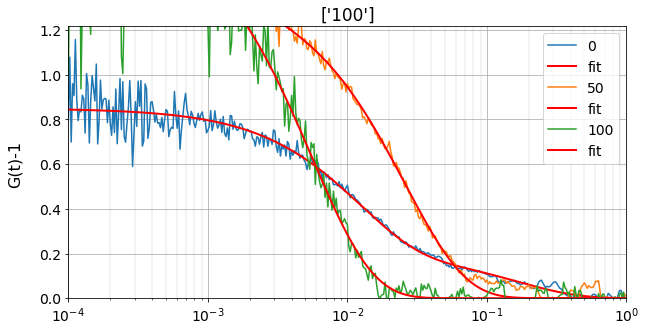

In [62]:
fig = fcsplot_potentials(foldername=S83d10Sept16_A3_30s, input_potential=[0, 25, 50, 100],
                       pointnumbers=[1], tmin=1e-4, tmax=1.0e0,
                      V_th = 60, figsize=(10, 5))

## Histogram: 1D

### 1-molecule

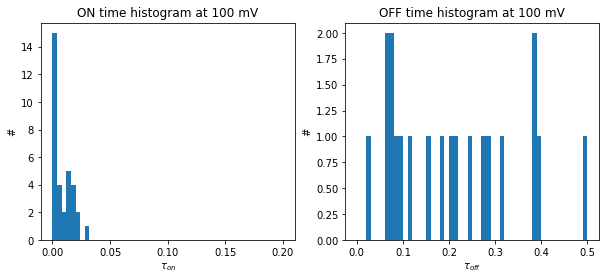

In [42]:
t_ons, t_offs = histogram_on_off_1mol(foldername= foldername, input_potential=[100], pointnumbers=[1],
                          bins_on=50, range_on=[0, 0.2], bins_off=50, range_off=[0, 0.5], plotting=True)

### All molecules

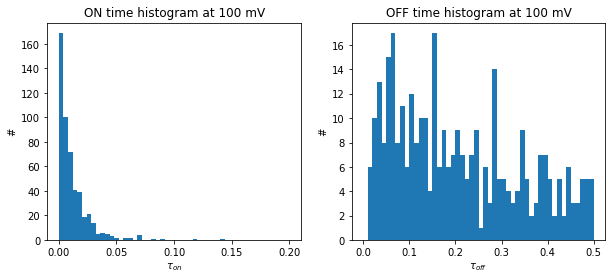

In [35]:
t_ons, t_offs = histogram_on_off_folder(foldername= foldername, input_potential=[100],
                                        pointnumbers=range(100),bins_on=50, range_on=[0, 0.2],
                                        bins_off=50, range_off=[0, 0.5], plotting=True);

## HIst:All molecules-all folders

all folders for Cu-Azurin at 60.5% power

In [8]:
def histogram_on_off_all_folder(folderlist= allfolders, input_potential=[100], pointnumbers=range(100),
                          bins_on=50, range_on=[0, 0.2], bins_off=50, range_off=[0, 0.5], plotting=False):
    t_ons = []; t_offs = []; n_on = []; n_off = [];
    for folder in folderlist:
        df_datn_emplot, df_FCS, folder = dir_mV_molNo(folder)
        df_specific = df_datn_emplot[df_datn_emplot['Point number'].isin(pointnumbers)]#keep all the points that exist
        df_specific = df_specific[df_specific['Potential'].isin(input_potential)]; df_specific.reset_index(drop=True, inplace=True)
        for i in range(len(df_specific)):
            Point_number = df_specific['Point number'][i]
            f_datn_path = df_specific['filepath[.datn]'].values[i]
            f_emplot_path = df_specific['filepath[.em.plot]'].values[i]
            df_emplot_filename = df_specific['filename[.em.plot]'][i]
            if os.path.isfile(f_emplot_path):
                try:
                    df_ton, df_toff, average_ton, average_toff, average_ton_err, average_toff_err = t_on_off_fromCP(f_emplot=f_emplot_path)
                except:
                    print('em.plot file: %s doesn''t contain proper data' %df_emplot_filename)
                    df_ton=[]; df_toff=[]
                    pass
            else:
                print('em.plot file of %s with potential %s doesn''t exist' %(Point_number, input_potential))
                df_ton=[]; df_toff=[]
            t_ons = np.concatenate((t_ons, df_ton), axis=0);
            t_offs = np.concatenate((t_offs, df_toff));
    n_on,bins_on = histogram(t_ons, range=range_on,bins=bins_on);
    n_off,bins_off = histogram(t_offs, range=range_off,bins=bins_off)
    def risetime_fit(t, k1, k2, A):
        return ((A*k1*k2/(k2-k1)) * (exp(-k1*t) - exp(-k2*t)))
    if plotting == True:
        fig, axes = plt.subplots(1, 2, figsize=(20,8))
        #------------ON/OFF histogram-------------------
        n_on,bins_on,patches = axes[0].hist(t_ons, range=range_on,bins=bins_on)
        t=bins_on[:-1]; n = n_on[:];
        fit, pcov = curve_fit(risetime_fit, t, n, p0=[10,1.1, 0.1], bounds=(0, np.inf))
        axes[0].plot(t, risetime_fit(t, *fit), 'k',lw=2,label='k1:'+str(fit[0])+'\n'+str(fit[1]))
        axes[0].set_xlabel(r'$\tau_{on}$')
        axes[0].set_ylabel('#')
        #axes[0].set_yscale('log')
        axes[0].set_title("ON time histogram at %s mV" %input_potential[0])
        axes[0].legend()
        
        n_off,bins_off,patches = axes[1].hist(t_offs, range=range_off,bins=bins_off)
        t=bins_off[:-1]; n = n_off[:];
        fit, pcov = curve_fit(risetime_fit, t, n, p0=[10,1.1, 0.1], bounds=(0, np.inf))
        axes[1].plot(t, risetime_fit(t, *fit), 'k',lw=2,label='k1:'+str(fit[0])+'\n'+str(fit[1]))
        axes[1].set_xlabel(r'$\tau_{off}$')
        axes[1].set_ylabel('#')
        #axes[1].set_yscale('log')
        axes[1].set_title("OFF time histogram at %s mV" %input_potential[0])
        axes[1].legend()
    return(t_ons, t_offs, n_on, bins_on, n_off, bins_off)

### on-off hist at E: all folder

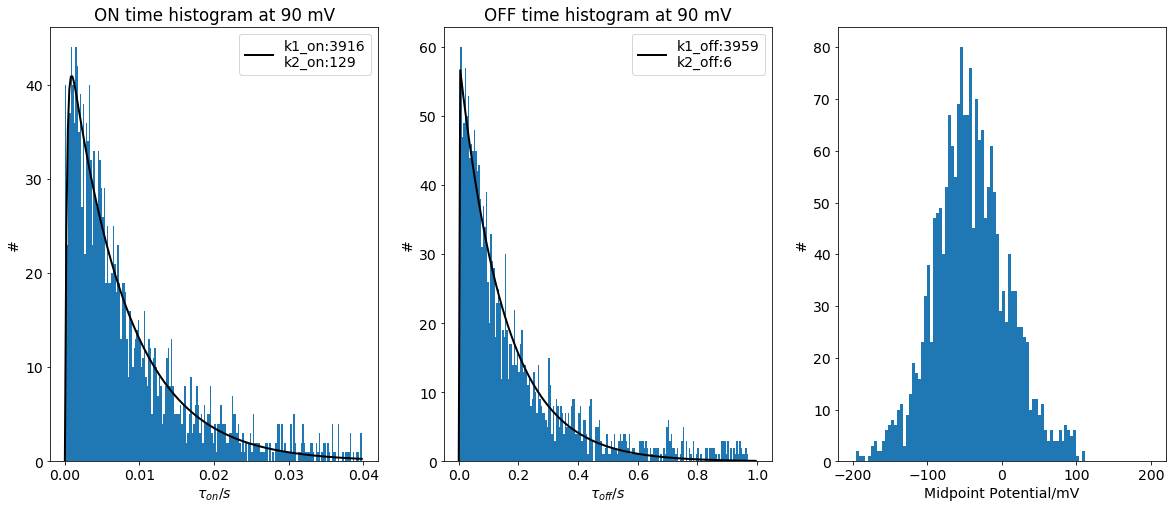

In [9]:
def hist_on_off_all_E0(folderlist= allfolders, input_potential=[100], pointnumbers=range(100),
                          bins_on=50, range_on=[0, 0.2], bins_off=50, range_off=[0, 0.5],
                                bins_E0=200, plotting=False):
    t_ons = []; t_offs = []; n_on = []; n_off = [];
    for folder in folderlist:
        df_datn_emplot, df_FCS, folder = dir_mV_molNo(folder)
        df_specific = df_datn_emplot[df_datn_emplot['Point number'].isin(pointnumbers)]#keep all the points that exist
        df_specific = df_specific[df_specific['Potential'].isin(input_potential)]; df_specific.reset_index(drop=True, inplace=True)
        for i in range(len(df_specific)):
            Point_number = df_specific['Point number'][i]
            f_datn_path = df_specific['filepath[.datn]'].values[i]
            f_emplot_path = df_specific['filepath[.em.plot]'].values[i]
            df_emplot_filename = df_specific['filename[.em.plot]'][i]
            if os.path.isfile(f_emplot_path):
                try:
                    df_ton, df_toff, average_ton, average_toff, average_ton_err, average_toff_err = t_on_off_fromCP(f_emplot=f_emplot_path)
                except:
                    print('em.plot file: %s doesn''t contain proper data' %df_emplot_filename)
                    df_ton=[]; df_toff=[]
                    pass
            else:
                print('em.plot file of %s with potential %s doesn''t exist' %(Point_number, input_potential))
                df_ton=[]; df_toff=[]
            t_ons = np.concatenate((t_ons, df_ton), axis=0);
            t_offs = np.concatenate((t_offs, df_toff));
    n_on,bins_on = histogram(t_ons, range=range_on,bins=bins_on);
    n_off,bins_off = histogram(t_offs, range=range_off,bins=bins_off)
    def risetime_fit(t, k1, k2, A):
        return ((A*k1*k2/(k2-k1)) * (exp(-k1*t) - exp(-k2*t)))
    if plotting == True:
        fig = plt.figure(figsize=(20,8))
        nrows=1; ncols= 3;
        ax00 = plt.subplot2grid((nrows,ncols), (0,0));
        ax01 = plt.subplot2grid((nrows,ncols), (0,1));
        ax02 = plt.subplot2grid((nrows,ncols), (0,2));
        #------------ON/OFF histogram-------------------
        n_on,bins_on,patches = ax00.hist(t_ons, range=range_on,bins=bins_on)
        t=bins_on[:-1]; n = n_on[:];
        fit, pcov = curve_fit(risetime_fit, t, n, p0=[10,1.1, 0.1], bounds=(0, np.inf))
        ax00.plot(t, risetime_fit(t, *fit), 'k',lw=2,label='k1_on:'+str(int(fit[0]))+
                  '\n'+'k2_on:'+str(int(fit[1])))
        ax00.set_xlabel(r'$\tau_{on}/s$')
        ax00.set_ylabel('#')
        #axes[0].set_yscale('log')
        ax00.set_title("ON time histogram at %s mV" %input_potential[0])
        ax00.legend()
        
        n_off,bins_off,patches = ax01.hist(t_offs, range=range_off,bins=bins_off)
        t=bins_off[:-1]; n = n_off[:];
        fit, pcov = curve_fit(risetime_fit, t, n, p0=[10,1.1, 0.1], bounds=(0, np.inf))
        ax01.plot(t, risetime_fit(t, *fit), 'k',lw=2,label='k1_off:'+str(int(fit[0]))+
                  '\n'+'k2_off:'+str(int(fit[1])))
        ax01.set_xlabel(r'$\tau_{off}/s$')
        ax01.set_ylabel('#')
        #axes[1].set_yscale('log')
        ax01.set_title("OFF time histogram at %s mV" %input_potential[0])
        ax01.legend()
        #------------MidPoint potential-------------
        if len(t_ons)> len(t_offs):
            t_ons = t_ons[:len(t_offs)]
        else:
            t_offs = t_offs[:len(t_ons)]
        t_on_ratio = t_offs/t_ons
        E_0 = potential-59 * log10(t_on_ratio)
        ax02.hist(E_0, bins=bins_E0, range=(-200, 200))
        ax02.set_xlabel('Midpoint Potential/mV')
        ax02.set_ylabel('#')
        plt.close()
    return(fig)
fig = hist_on_off_all_E0(folderlist = allfolders, input_potential=[90], pointnumbers=range(100), 
                        bins_on=200, range_on=[0, 0.04], bins_off=200, range_off=[0, 1],
                         bins_E0=100,plotting=True)
fig

### hist all rates: all E

em.plot file of 2.0 with potential [100] doesnt exist
em.plot file of 15.0 with potential [100] doesnt exist
em.plot file of 2.0 with potential [100] doesnt exist
em.plot file of 15.0 with potential [100] doesnt exist


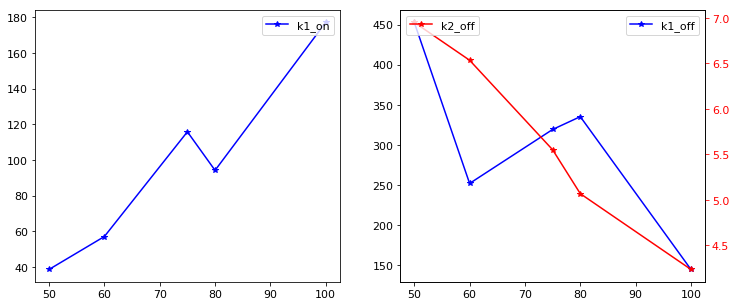

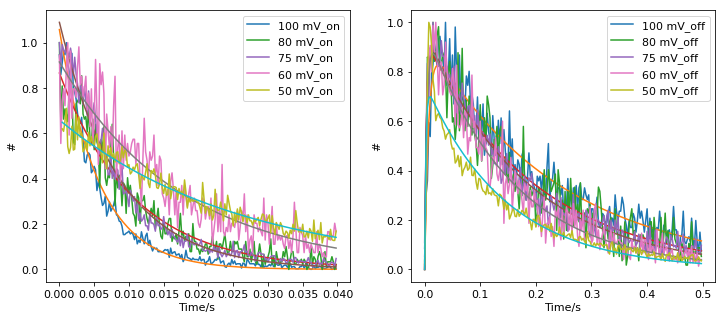

In [124]:
#hist all rates
def risetime_fit(t, k1, k2, A):
    return ((A*k1*k2/(k2-k1)) * (exp(-k1*t) - exp(-k2*t)))
def mono_exp(t, k1, A):
    return A*exp(-k1*t)
columns=['potential','k1_on', 'k1_off', 'k2_off']
df_k = pd.DataFrame(index=None, columns=columns);
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages(r'/home/biswajit/Downloads/hist_k1_k2.pdf')

df_on_of_hist = pd.DataFrame()
# fig, axes = plt.subplots(2,2, figsize = (12, 5))
potential_list = [100, 90, 80, 75, 70, 60, 50]
def hist_fit_rates(potential_list=[100, 90], folderlist=allfolders, pdf=pdf, df_k=df_k,
                   t_on_min=0, df_on_of_hist=df_on_of_hist):
    for i in range(len(potential_list)):
        potential=[potential_list[i]]
        t_ons, t_offs, n_on, bins_on, n_off, bins_off = histogram_on_off_all_folder(folderlist= folderlist, input_potential=potential,
                                                                                    pointnumbers=range(100), bins_on=200, range_on=[0, 0.04], bins_off=400, range_off=[0, 1], plotting=False)
        t=bins_on[t_on_min:-1]; n = n_on[t_on_min:]/max(n_on);
        fit, pcov = curve_fit(mono_exp, t, n, p0=[10,1.1], bounds=(0, np.inf))
        n_fit = mono_exp(t, *fit)
#         if fit[0]>fit[1]:
#             k1_on=fit[0]; k2_on=fit[1]
#         else: k1_on=fit[1]; k2_on=fit[0]
        k1_on = fit[0];
        fig, axes = plt.subplots(1,2, figsize = (12, 5))
        axes[0].plot(t, n, 'o',label=str(potential[0])+' mV')
        axes[0].plot(t, mono_exp(t, *fit), 'g',label='k1_on:'+str(int(k1_on)))
        axes[0].set_title("ON time histogram at different potential")
        axes[0].set_xlabel('On times')
        axes[0].set_ylabel('#')
        axes[0].legend()
        #save on-hist to df
        pot_col_name = str(potential[0])+' mV'+'_on';
        tim_col_name = 'time_on'+str(potential);
        fit_col_name = 'fit_on'+str(potential);
        df_on_of_hist[tim_col_name] = pd.Series(t, index=None);
        df_on_of_hist[pot_col_name] = pd.Series(n, index=None);
        df_on_of_hist[fit_col_name] = pd.Series(n_fit, index=None);

        t=bins_off[:-1]; n = n_off/max(n_off)
        fit, pcov = curve_fit(risetime_fit, t, n, p0=[10,1.1, 0.1], bounds=(0, np.inf))
        n_fit = risetime_fit(t, *fit)
        if fit[0]>fit[1]:
            k1_off=fit[0]; k2_off=fit[1]
        else: k1_off=fit[1]; k2_off=fit[0]
        axes[1].plot(t, n,'o', label=str(potential[0])+' mV')
        axes[1].plot(t, risetime_fit(t, *fit), 'g', label='k1_off:'+str(int(k1_off))+'\n'
                    +'k2_off:'+str(int(k2_off)))
        axes[1].set_title("OFF time histogram at different potential")
        axes[1].set_xlabel('On times')
        axes[1].set_ylabel('#')
        axes[1].legend()
        #save off-hist to df
        pot_col_name = str(potential[0])+' mV'+'_off';
        tim_col_name = 'time_off'+str(potential);
        fit_col_name = 'fit_off'+str(potential)
        df_on_of_hist[tim_col_name] = pd.Series(t, index=None);
        df_on_of_hist[pot_col_name] = pd.Series(n, index=None);
        df_on_of_hist[fit_col_name] = pd.Series(n_fit, index=None);
        
        columns=['potential','k1_on', 'k1_off', 'k2_off']
        df_k_temp = pd.DataFrame([[potential[0], k1_on, k1_off, k2_off]], columns=columns);
        df_k = df_k.append(df_k_temp, ignore_index=True)

        pdf.savefig(fig)
        plt.close()
    return df_k, pdf, df_on_of_hist
##
df_k, pdf, df_on_of_hist = hist_fit_rates(potential_list=[100], folderlist=allfolders, pdf=pdf, df_k=df_k);
df_k, pdf, df_on_of_hist = hist_fit_rates(potential_list=[80, 75], folderlist=allfolders, pdf=pdf, df_k=df_k);
# df_k, pdf, df_on_of_hist = hist_fit_rates(potential_list=[70], folderlist=allfolders, pdf=pdf, df_k=df_k, t_on_min=1);
df_k, pdf, df_on_of_hist = hist_fit_rates(potential_list=[60], folderlist=allfolders, pdf=pdf, df_k=df_k);
df_k, pdf, df_on_of_hist = hist_fit_rates(potential_list=[50], folderlist=allfolders, pdf=pdf, df_k=df_k, t_on_min=2);
##
fig1, axes = plt.subplots(1,2, figsize = (12, 5))
axes[0].plot(df_k['potential'], df_k['k1_on'], 'b-*', label='k1_on')
# ax1_r = axes[0].twinx()
# ax1_r.plot(df_k['potential'], df_k['k2_on'], 'r-*', label='k2_on')
# ax1_r.tick_params('y', colors='r')

axes[1].plot(df_k['potential'], df_k['k1_off'], 'b-*', label='k1_off')
ax2_r = axes[1].twinx()
ax2_r.plot(df_k['potential'], df_k['k2_off'], 'r-*', label='k2_off')
ax2_r.tick_params('y', colors='r')
axes[0].legend(loc=1); ax1_r.legend(loc=2);axes[1].legend(loc=1);ax2_r.legend(loc=2)
pdf.savefig(fig1)
##
pot_len = shape(df_on_of_hist)[1]/6;
col_values = list(df_on_of_hist.columns.values);
fig_all_hist, axes = plt.subplots(1,2, figsize = (12, 5))
for i in range(int(pot_len)):
    j=6*i;
    axes[0].plot(df_on_of_hist.iloc[:,j], df_on_of_hist.iloc[:, j+1], label=col_values[j+1])
    axes[0].plot(df_on_of_hist.iloc[:,j], df_on_of_hist.iloc[:, j+2], label='')
    axes[0].set_xlabel('Time/s')
    axes[0].set_ylabel('#')    
    axes[0].legend()
    
    axes[1].plot(df_on_of_hist.iloc[:, j+3], df_on_of_hist.iloc[:, j+3+1], label=col_values[j+4])
    axes[1].plot(df_on_of_hist.iloc[:, j+3], df_on_of_hist.iloc[:,j+3+2], label='')
    axes[1].set_xlabel('Time/s')
    axes[1].set_ylabel('#')    
    axes[1].legend()
pdf.savefig(fig_all_hist)
#-------------------MID point potential------------------
for potential in [100, 90, 80, 75, 70, 60, 50]:
    fig = hist_on_off_all_E0(folderlist = allfolders, input_potential=[potential], pointnumbers=range(100), 
                        bins_on=200, range_on=[0, 0.04], bins_off=200, range_off=[0, 1],
                         bins_E0=100,plotting=True)
    pdf.savefig(fig);
#close 'pdf' page
pdf.close()

### Individual long traces: analysis

In [17]:
def single_azurin_hist(foldername= foldername, input_potential=[100], pointnumbers=[1],bin_trace=5,
                          bins_on=100, range_on=[0, 0.1], bins_off=100, range_off=[0, 1], show_changepoint=False, sum_points=10):
    df_datn_emplot, df_FCS, folder = dir_mV_molNo(foldername)
    df_specific = df_datn_emplot[df_datn_emplot['Point number'].isin(pointnumbers)]#keep all the points that exist
    df_specific = df_specific[df_specific['Potential'].isin(input_potential)]; df_specific.reset_index(drop=True, inplace=True)
    #f_emplot_path = 'x'; f_datn_path='x'; t_ons=[];t_offs=[];n_on = []; n_off = []
    fig=0;#returns zero if the file not found
    t_av_on=[]; t_av_off=[]; t_abs = []
    if not df_specific.empty:
        f_datn_path = df_specific['filepath[.datn]'].values[0]
        f_emplot_path = df_specific['filepath[.em.plot]'].values[0]
        if os.path.isfile(f_emplot_path):
            #----------fig properties-----------
            fig = plt.figure(figsize=(8, 16));
            mpl.rcParams["font.family"] = "sans-serif"
            mpl.rcParams["font.size"] = "11"
            colormap=mpl.cm.RdBu_r
            nrows=6; ncols=2;
            ax0 = plt.subplot2grid((nrows,ncols), (0,0), colspan=2);
            ax10 = plt.subplot2grid((nrows,ncols), (1,0));
            ax11 = plt.subplot2grid((nrows,ncols), (1,1));
            ax2 = plt.subplot2grid((nrows,ncols), (2,0), colspan=2);
            ax3 = plt.subplot2grid((nrows,ncols), (3,0), colspan=2);
            ax40 = plt.subplot2grid((nrows,ncols), (4,0));
            ax41 = plt.subplot2grid((nrows,ncols), (4,1));
            ax50 = plt.subplot2grid((nrows,ncols), (5,0));
            ax51 = plt.subplot2grid((nrows,ncols), (5,1));
            #-------------tIME TRACE ax0------------
            ax0.set_title('Point number: '+str(pointnumbers)+' at '+str(input_potential)+' mV', fontsize=20)
            df = pd.read_csv(f_datn_path, header=None)#Original data
            tt_length=max(df[0])-min(df[0])
            tt_length = round(tt_length, 0)
            binpts= tt_length*1000/bin_trace
            df_hist = histogram(df[0], bins=binpts,range=(min(df[0]), max(df[0])))
            ax0.plot(df_hist[1][:-1], df_hist[0]/bin_trace, 'b', label=str(input_potential[0])+" mV")#original data
            if show_changepoint==True:
                df = pd.read_csv(f_emplot_path, header=None, sep='\t') #change-point
                ax0.plot(df[0], df[1]*0.8/1000, 'r', linewidth=2, label='')#change-point analysis
            ax0.set_xlabel('Time/s')
            ax0.set_xlim(min(df[0]), max(df[0]))
            ax0.set_ylabel('Counts(kcps)')
            # -----------ON OFF histogram; ax10, ax11-----------
            df_ton, df_toff, average_ton, average_toff, average_ton_err, average_toff_err = t_on_off_fromCP(f_emplot=f_emplot_path);
            t_ons = np.array(df_ton);t_offs = np.array(df_toff)
            n_on,bins_on,patches = ax10.hist(t_ons, range=range_on, bins=bins_on, color='k', alpha=0.5)
            n_on,bins_on,patches = ax10.hist(t_ons, range=range_on, bins=bins_on, color='k', histtype='step')
            ax10.set_xlim(0, None)
            ax10.set_xlabel(r'$\tau_{on}/s$')
            ax10.set_ylabel('#')
            n_off,bins_off,patches = ax11.hist(t_offs, range=range_off,bins=bins_off, color='k', alpha=0.5)
            n_off,bins_off,patches = ax11.hist(t_offs, range=range_off,bins=bins_off, color='k', histtype='step')
            ax11.set_xlim(0, None)
            ax11.set_xlabel(r'$\tau_{off}/s$')
            #-----------traces of rates (ON / OFF); ax2, ax3-------
            sum_points = sum_points;# no of points to average (for on and off times)
            num_outputs = int(len(t_ons)/sum_points)
            start = 0;
            t_av_on = []; t_av_off = []; t_abs = [];
            for i in range(num_outputs):
                t_av_on_temp = sum(t_ons[start:start+sum_points])
                t_av_of_temp = sum(t_offs[start:start+sum_points])
                start += sum_points
                t_av_on.append(t_av_on_temp)
                t_av_off.append(t_av_of_temp)
                t_abs_temp = sum(t_ons[:start+sum_points]) + sum(t_offs[:start+sum_points])
                t_abs.append(t_abs_temp)
            t_av_on = pd.Series(t_av_on);
            t_av_off = pd.Series(t_av_off)
            ax2.plot(t_abs, t_av_on, 'b', label='On_av('+str(sum_points)+'events)')
            ax2.set_ylim(0, None)
            ax2.set_xlim(0, None)
            ax2.tick_params('y', colors='b')
            ax2.set_ylabel('ton_av/s', color='b')
            ax2.set_xticks([])
            ax2.legend()
            ax3.plot(t_abs, t_av_off, 'r',label='Off_av('+str(sum_points)+'events)')
            ax3.tick_params('y', colors='r')
            ax3.set_ylabel('toff_av/s', color='r')
            ax3.set_ylim(0, None)#BE CAREFUL of this limit
            ax3.set_xlim(0, None)
            ax3.set_xlabel('time/s')
            ax3.legend()
            #----------ON-OFF 2D hist & Midpoint potential; ax40, ax41------------
            ontimes = t_av_on[:-10];
            offtimes = t_av_off[:-10];
            if len(ontimes)> len(offtimes):
                ontimes = ontimes[:len(offtimes)]
            else:
                offtimes = offtimes[:len(ontimes)]
            if len(t_ons)> len(t_offs):
                t_ons = t_ons[:len(t_offs)]
            else:
                t_offs = t_offs[:len(t_ons)] 
            ax40.hist2d(t_ons, t_offs, bins=40, range=([0, 0.1], [0, 0.5]), cmap=colormap);
            ax40.set_ylabel(r'$\tau_{on}/s$')
            ax40.set_ylabel(r'$\tau_{off}/s$')
            t_on_ratio = offtimes/ontimes;
            E_0 = potential-59 * log10(t_on_ratio)
            ax41.hist(E_0, bins=40, range=(-150, 150))
            ax41.set_xlabel('Midpoint Potential/mV')
            ax41.set_ylabel('#')
            ax41.set_xlabel(r'$E_0[mV]$')
            #-----------correlation of traces of rates; ax50, ax51------------- 
            try:
                m=(len(t_av_on)/2)-5;
                G = autocorrelate(t_av_on[:-1], m=m ,deltat=1,normalize=True);
                ax50.plot(G[:,0], G[:,1], 'b',label='On time correlation')
                ax50.set_xscale('log')
                ymax_lim = G[1]
                ax50.set_ylim(-0.01, ymax_lim[1]+0.1*ymax_lim[1])

                #ax50.set_title("ON time dynamic corr at\n %s mV of Point_%s" %(input_potential, pointnumbers))
                #ax50.set_ylim(0, None)
                ax50.legend()
                #off-time correlation-------
                m=(len(t_av_off)/2)-5;
                G = autocorrelate(t_av_off[:-1], m=m ,deltat=1,normalize=True);
                ax51.plot(G[:,0], G[:,1], 'r',label='Off time correlation')
                ax51.set_xscale('log')
                ymax_lim = G[1]
                ax51.set_ylim(-0.01, ymax_lim[1]+0.1*ymax_lim[1])
                #ax51.set_title("OFF time dynamic corr\n at %s mV of Point_%s" %(input_potential, pointnumbers))
                ax51.legend()
            except:
                pass
        #fig.tight_layout() #figsize=(20, 10)
        plt.close()
    return fig, t_abs, t_av_on, t_av_off

#### all CuAzurin traces

For each single-azurin long traces, different analysis were plot and all the figures were written to a pdf.

In [18]:
#All Cu zurin traces
S106d18May17_635_CuAzu655_longtime = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/S106d18May17_635_CuAzu655_longtime';
S105d15May17_60o5_635_A1_CuAzu655_longtime = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/S105d15May17_60.5%635_A1_CuAzu655_longtime';
Excluded_rate_analysis = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/Excluded_rate_analysis';
S83d10Sept16_Cu_50mV_300s = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160910_CuAzu655Ferri_asc_2ndtime/S83d10Sept16_CuAz655_0.1mMAsc_0.2mMFerri_0.11uW_A3/300sec_trace';

long_trace_files = [S105d15May17_60o5_635_A1_CuAzu655_longtime, S106d18May17_635_CuAzu655_longtime, Excluded_rate_analysis, S83d10Sept16_Cu_50mV_300s];

from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages(r'/home/biswajit/Downloads/multipdf.pdf')

point_list = range(50) #range(50), [16] 
for potential in [100, 75, 50]:#range(20), [19]
    potential=[potential]
    for i in point_list:
        pointnumbers=[i]
        for folder in long_trace_files:#long_trace_files:#[S83d10Sept16_Cu_50mV_500s]:
            fig, t_abs, t_av_on, t_av_off = single_azurin_hist(foldername=folder, input_potential=potential, pointnumbers=pointnumbers, sum_points=5)
            if fig !=0:
                os.chdir('/home/biswajit/Downloads/')
                pdf.savefig(fig)
os.chdir('/home/biswajit/Downloads/')
pdf.close()

#### Single CuAzurin traces

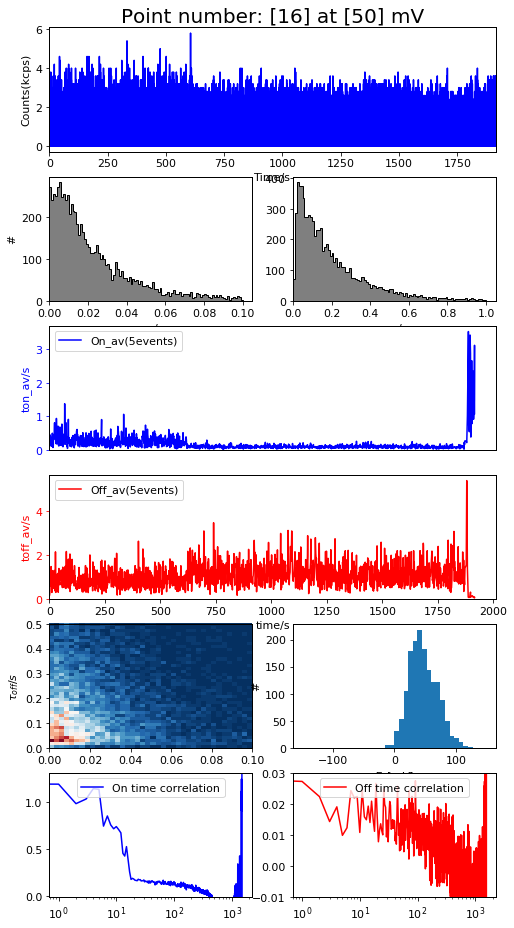

In [166]:
S106d18May17_635_CuAzu655_longtime = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/S106d18May17_635_CuAzu655_longtime';
S105d15May17_60o5_635_A1_CuAzu655_longtime = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/S105d15May17_60.5%635_A1_CuAzu655_longtime';
Excluded_rate_analysis = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/Excluded_rate_analysis';
S83d10Sept16_Cu_50mV_300s = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160910_CuAzu655Ferri_asc_2ndtime/S83d10Sept16_CuAz655_0.1mMAsc_0.2mMFerri_0.11uW_A3/300sec_trace';

long_trace_files = [S105d15May17_60o5_635_A1_CuAzu655_longtime, S106d18May17_635_CuAzu655_longtime, Excluded_rate_analysis, S83d10Sept16_Cu_50mV_300s];
fig, t_abs, t_av_on, t_av_off = single_azurin_hist(foldername=S105d15May17_60o5_635_A1_CuAzu655_longtime, input_potential=[50], pointnumbers=[16], sum_points=5)
fig

Mid point potentials were calculated from average on and off time. Next we plot the variation of E_0 and fwhm as we average over n points

- the values converges with averaging over 15 points (min). With 25, it totally converges.

Each potential distribution with fit is saved in 'download/gaussianfit' folder 

In [164]:
#E_0 from each molecule
S106d18May17_635_CuAzu655_longtime = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/S106d18May17_635_CuAzu655_longtime';
S105d15May17_60o5_635_A1_CuAzu655_longtime = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/S105d15May17_60.5%635_A1_CuAzu655_longtime';
Excluded_rate_analysis = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/Excluded_rate_analysis';
S83d10Sept16_Cu_50mV_300s = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160910_CuAzu655Ferri_asc_2ndtime/S83d10Sept16_CuAz655_0.1mMAsc_0.2mMFerri_0.11uW_A3/300sec_trace';

cols=['sum_points' ,'center', 'center_err', 'fwhm', 'fwhm_err']
df = pd.DataFrame(columns=cols)
for i in range(50):
    sum_points = i+1
    long_trace_files = [S105d15May17_60o5_635_A1_CuAzu655_longtime, S106d18May17_635_CuAzu655_longtime, Excluded_rate_analysis, S83d10Sept16_Cu_50mV_300s];
    fig, t_abs, t_av_on, t_av_off = single_azurin_hist(foldername=S106d18May17_635_CuAzu655_longtime, input_potential=[100], pointnumbers=[26], sum_points=sum_points)
    # fig
    plt.figure()
    potential=100;
    t_on_ratio = t_av_off/t_av_on;
    E_0 = potential-59 * log10(t_on_ratio)
    bins=40; range_fit = [-150, 150];
    bin_centers = linspace(range_fit[0], range_fit[1], bins);

    n, bins_hist, patches = hist(E_0, bins=bins, range=range_fit)
    y=n; x=bin_centers;

    # plot(x, y)
    def gaussian(x, a, b, c):
        return a*exp((-(x-b)**2)/(2*c**2))
    fit, pcov = curve_fit(gaussian, xdata=x, ydata=y, p0=[100, 5, 25], bounds=(0, np.inf))
    perr = np.sqrt(np.diag(pcov));
    center=round(fit[1], 1); center_err = round(perr[1], 1);
    fwhm=round(2.3548*fit[2],1); fwhm_err = round(2.3548*perr[2],1);
    df_temp = pd.DataFrame([[sum_points, center, center_err, fwhm, fwhm_err]], columns=cols);
    df = df.append(df_temp, ignore_index=True)
    #print('Center is %.1f and fwhm is %.1f' %(center, fwhm))
    plot(x, gaussian(x, *fit), label=str(center)+'+-'+str(center_err)+'\n'+
                                    str(fwhm)+'+-'+str(fwhm_err)+'\n')
    xlabel('Midpoint Potential/mV')
    ylabel('#')
    xlabel(r'$E_0[mV]$')
    legend()
    savefig('/home/biswajit/Downloads/gaussianfit/'+'sumpoints_'+str(i)+'.png')
    plt.close()
# df

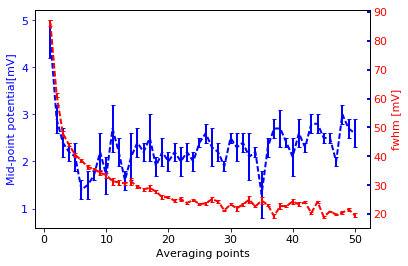

In [165]:
# df: fit values and parameters were obtained in previous cell
fig, ax = plt.subplots()
linestyle = {"linestyle":"--", "linewidth":2, "markeredgewidth":1, "elinewidth":2, "capsize":2}
tickstyle = {"direction":"in", "width":2, "color":'b'}
rc('axes', linewidth=1)

ax.errorbar(df['sum_points'], df['center'], yerr=df['center_err'], color='b', **linestyle)
ax.set_ylabel('Mid-point potential[mV]', color='b')
ax.tick_params('y', colors='b')

ax_r = twinx(ax);
ax_r.errorbar(df['sum_points'], df['fwhm'],yerr=df['fwhm_err'], color='r', **linestyle)
ax_r.set_ylabel('fwhm [mV]', color='r')
ax_r.tick_params('y', colors='r', **axistyle)
ax.set_xlabel('Averaging points')

histogram of E0 and FWHM

In [182]:
#E_0 from each molecule
S106d18May17_635_CuAzu655_longtime = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/S106d18May17_635_CuAzu655_longtime';
S105d15May17_60o5_635_A1_CuAzu655_longtime = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/S105d15May17_60.5%635_A1_CuAzu655_longtime';
Excluded_rate_analysis = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/Excluded_rate_analysis';
S83d10Sept16_Cu_50mV_300s = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160910_CuAzu655Ferri_asc_2ndtime/S83d10Sept16_CuAz655_0.1mMAsc_0.2mMFerri_0.11uW_A3/300sec_trace';
S81d7Sept16_A3_60s=r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160907_CuAzu655_Ferri_Asc_analysis/S81d7Sept16_0.11uW_0.2mMFerri_0.1mM Asc_A3_ON/60sec_trace'
S81d7Sept16_A2_60s=r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160907_CuAzu655_Ferri_Asc_analysis/S81d7Sept16_0.11uW_0.2mMFerri_0.1mM Asc_20mV(27)_A2_suba1_2'
long_trace_files = [S105d15May17_60o5_635_A1_CuAzu655_longtime,
                    S106d18May17_635_CuAzu655_longtime,
                    S83d10Sept16_Cu_50mV_300s];
# S81d7Sept16_A3_60s,
# S81d7Sept16_A2_60s,
# S81d7Sept16_A5_ON
cols=['point', 'potential', 'center', 'center_err', 'fwhm', 'fwhm_err']
df = pd.DataFrame(columns=cols)
sum_points = 20;

for folder in long_trace_files:
    for point in range(50):
        for potential in [50, 75, 100]:
            try:
                fig, t_abs, t_av_on, t_av_off = single_azurin_hist(foldername=folder,
                                                           input_potential=[potential],
                                                                   pointnumbers=[point],
                                                           sum_points=sum_points);
                plt.close()
                if len(t_av_on) > 20:
                    # fig
                    plt.figure()
                    potential=potential;
                    t_on_ratio = t_av_off/t_av_on;
                    E_0 = potential-59 * log10(t_on_ratio)
                    bins=40; range_fit = [-150, 150];
                    bin_centers = linspace(range_fit[0], range_fit[1], bins);

                    n, bins_hist, patches = hist(E_0, bins=bins, range=range_fit)
                    y=n; x=bin_centers;

                    # plot(x, y)
                    def gaussian(x, a, b, c):
                        return a*exp((-(x-b)**2)/(2*c**2))
                    fit, pcov = curve_fit(gaussian, xdata=x, ydata=y, p0=[10, 5, 25], bounds=(0, np.inf))
                    perr = np.sqrt(np.diag(pcov));
                    center=round(fit[1], 1); center_err = round(perr[1], 1);
                    fwhm=round(2.3548*fit[2],1); fwhm_err = round(2.3548*perr[2],1);
                    df_temp = pd.DataFrame([[point, potential, center, center_err, fwhm, fwhm_err]], columns=cols);
                    df = df.append(df_temp, ignore_index=True)
                    print('Center is %.1f and fwhm is %.1f' %(center, fwhm))
                    E0_fitrange = linspace(range_fit[0], range_fit[1], 100);
                    plot(x, gaussian(x, *fit), label=str(center)+'+-'+str(center_err)+'\n'+
                                                    str(fwhm)+'+-'+str(fwhm_err)+'\n')
                    xlabel('Midpoint Potential/mV')
                    ylabel('#')
                    xlabel(r'$E_0[mV]$')
                    legend()
                    savefig('/home/biswajit/Downloads/gaussianfit/'+str(point)+'_'+str(potential)
                            +'mV'+'sumpoints_'+'.png')
                    plt.close()
                    # df
            except:
                pass

Center is 10.1 and fwhm is 24.6
Center is 68.6 and fwhm is 31.1
Center is 0.0 and fwhm is 54.0
Center is 0.2 and fwhm is 22.2
Center is 21.0 and fwhm is 19.3
Center is 0.0 and fwhm is 53.7
Center is 0.0 and fwhm is 57.4
Center is 40.8 and fwhm is 23.7
Center is 0.0 and fwhm is 40.9
Center is 0.0 and fwhm is 131.3
Center is 14.2 and fwhm is 18.8
Center is 43.9 and fwhm is 33.4
Center is 3.2 and fwhm is 26.8
Center is 0.0 and fwhm is 27.0
Center is 11.1 and fwhm is 14.4
Center is 0.0 and fwhm is 22.0
Center is 0.4 and fwhm is 25.3
Center is 0.0 and fwhm is 79.1
Center is 2.0 and fwhm is 25.9
Center is 0.0 and fwhm is 30.9
Center is 24.7 and fwhm is 18.0
Center is 0.0 and fwhm is 22.0
Center is 0.1 and fwhm is 17.2
Center is 0.7 and fwhm is 26.3
Center is 0.0 and fwhm is 20.5
Center is 9.3 and fwhm is 12.6
Center is 6.0 and fwhm is 38.8
Center is 7.1 and fwhm is 17.9
Center is 18.3 and fwhm is 17.3


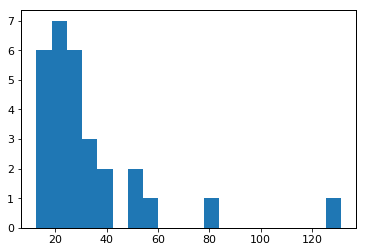

In [193]:
hist(df['fwhm'], bins=20);

For a single-azurin long trace, different analysis were plot

789


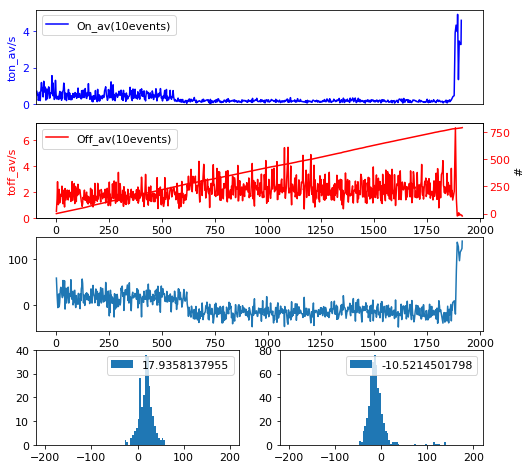

In [60]:
# Point_16: long trace (single one)
folder = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/S105d15May17_60.5%635_A1_CuAzu655_longtime';
sum_points=10;
fig, t_abs, t_av_on, t_av_off = single_azurin_hist(foldername=folder, input_potential=[50],
                                                   pointnumbers=[16], sum_points=10)

# t_av_on = pd.Series(t_av_on);
# t_av_off = pd.Series(t_av_off);
ontimes = t_av_on;
offtimes = t_av_off;
# if len(ontimes)> len(offtimes):
#     ontimes = ontimes[:len(offtimes)]
# else:
#     offtimes = offtimes[:len(ontimes)]
t_on_ratio = offtimes/ontimes;
fig = plt.figure(figsize=(8, 8))
nrows=4; ncols=2;
ax0 = plt.subplot2grid((nrows, ncols), (0,0), colspan=2)
ax1 = plt.subplot2grid((nrows, ncols), (1,0), colspan=2)
ax2 = plt.subplot2grid((nrows, ncols), (2,0), colspan=2)
ax30 = plt.subplot2grid((nrows, ncols), (3,0))
ax31 = plt.subplot2grid((nrows, ncols), (3,1))

ax0.plot(t_abs, t_av_on, 'b', label='On_av('+str(sum_points)+'events)')
ax0.set_ylim(0, None)
ax0.set_xlim(0, None)
ax0.tick_params('y', colors='b')
ax0.set_ylabel('ton_av/s', color='b')
ax0.set_xticks([])
ax0.legend()
ax1.plot(t_abs, t_av_off, 'r',label='Off_av('+str(sum_points)+'events)')
ax1.tick_params('y', colors='r')
ax1.set_ylabel('toff_av/s', color='r')
ax1.set_ylim(0, None)#BE CAREFUL of this limit
ax1.set_xlim(0, None)
ax1.set_xlabel('time/s')
ax1.legend()
ax1_r = ax1.twinx()
ax1_r.plot(t_abs,range(len(t_abs)), 'r', label='$reduced_- ascorbate$')
ax1_r.tick_params('y', colors='r')

E_0 = potential-59 * log10(t_on_ratio)
ax2.plot(t_abs, E_0)
ax30.hist(E_0[:250], bins=100, range=(-200, 200), label=str(average(E_0[:250])))
ax30.legend()
ax31.hist(E_0[250:], bins=100, range=(-200, 200), label=str(average(E_0[250:])))
ax31.legend()
xlabel('Midpoint Potential/mV')
ylabel('#')
xlabel(r'$E_0[mV]$')
print(len(t_av_on))

#### All ZnAzurin traces

In [20]:
S107d1May17_635_ZnAzu655_longtime = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/ZnAzurin_Data/S107d1May17_635_ZnAzu655_longtime';
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages(r'/home/biswajit/Downloads/multipdf_Zn.pdf')

point_list = range(50) #range(50), [16] 
for potential in [50, 25, 0]:#range(20), [19]
    potential=[potential]
    for i in point_list:
        pointnumbers=[i]
        for folder in long_trace_files:#long_trace_files:#[S83d10Sept16_Cu_50mV_500s]:
            fig, t_abs, t_av_on, t_av_off = single_azurin_hist(foldername=S107d1May17_635_ZnAzu655_longtime,
                                                            input_potential=potential, pointnumbers=pointnumbers, sum_points=5)
            if fig !=0:
#                 os.chdir('/home/biswajit/Downloads/')
                pdf.savefig(fig)
# os.chdir('/home/biswajit/Downloads/')
pdf.close()

## E0 from on_avg & off_avg

em.plot file: /home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160907_CuAzu655_Ferri_Asc_analysis/S81d7Sept16_0.11uW_0.2mMFerri_0.1mM Asc_A5_ON/./Point_7/data/Point_0.11uW_A5_150mV(64)_7.pt3.datn.em.plot doesnt contain proper data


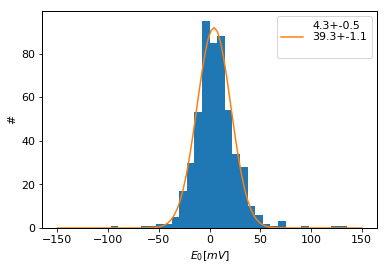

In [171]:
def hist_E0_fromavg_all_sm(folderlist= long_trace_files):
    '''E_0 for each molecule calculated from it's on_avg and off_avg times.
    Finally a histgram is made from all E_0
    '''
    E0_list = []
    for folder in folderlist:
        df_datn_emplot, df_FCS, folder = dir_mV_molNo(folder);
        df_specific = df_datn_emplot
        for i in range(len(df_specific)):
            f_emplot_path = df_specific['filepath[.em.plot]'].values[i];
            potential = df_specific['Potential'].values[i];
            potential = float(potential);
            if os.path.isfile(f_emplot_path) and potential>40:
                try:
                    df_ton, df_toff, average_ton, average_toff, average_ton_err, average_toff_err = t_on_off_fromCP(f_emplot=f_emplot_path);
                    t_ratio = average_toff/average_ton;
                    E_0 = potential-59 * log10(t_ratio);
                    E0_list.append(E_0);
                except:
                    print('em.plot file: %s doesn''t contain proper data' %f_emplot_path)
                    pass
    return(E0_list)

E0_list = hist_E0_fromavg_all_sm(folderlist=allfolders);
#plotting and fitting
E_0 = E0_list;
bins=40; range_fit = [-150, 150];
bin_centers = linspace(range_fit[0], range_fit[1], bins);

n, bins_hist, patches = hist(E_0, bins=bins, range=range_fit)
y=n; x=bin_centers;

# plot(x, y)
def gaussian(x, a, b, c):
    return a*exp((-(x-b)**2)/(2*c**2))
fit, pcov = curve_fit(gaussian, xdata=x, ydata=y, p0=[100, 5, 25], bounds=(0, np.inf))
perr = np.sqrt(np.diag(pcov));
center=round(fit[1], 1); center_err = round(perr[1], 1);
fwhm=round(2.3548*fit[2],1); fwhm_err = round(2.3548*perr[2],1);
df_temp = pd.DataFrame([[sum_points, center, center_err, fwhm, fwhm_err]], columns=cols);
df = df.append(df_temp, ignore_index=True)
#print('Center is %.1f and fwhm is %.1f' %(center, fwhm))
E0_fitrange = linspace(range_fit[0], range_fit[1], 100);
plot(E0_fitrange, gaussian(E0_fitrange, *fit), label=str(center)+'+-'+str(center_err)+'\n'+
                                str(fwhm)+'+-'+str(fwhm_err)+'\n')
xlabel('Midpoint Potential/mV')
ylabel('#')
xlabel(r'$E_0[mV]$')
legend()

## timetrace_outputs_folderwise

In [188]:
timetrace_output = cp_outputs_folderwise(folderpath=foldername, pointnumbers=[1], potentialist=potentialist)
timetrace_output

Point_1                                                               \
   Potential       t_onav t_onaverr      t_offav t_offaverr       t_ratio   
0        0.0  0.047458091    0.0167  0.174862119     0.0617   3.684558631   
1       15.0  0.041029713    0.0103  0.077266357     0.0195   1.883180529   
2       20.0  0.041220322    0.0117  0.107107465     0.0304   2.598414099   
3       25.0  0.040270583    0.0110  0.097844464     0.0267   2.429675888   
4       35.0  0.035181763    0.0099  0.108800099     0.0305   3.092514115   
5       40.0  0.033138303    0.0094  0.116085988     0.0329   3.503075808   
6       55.0  0.033374118    0.0109  0.160215559     0.0524   4.800593029   
7       60.0  0.029071190    0.0093  0.159897774     0.0513   5.500214239   
8       75.0  0.061356434    0.0256  0.242367561     0.1010   3.950157246   
9       90.0  0.037583729    0.0146  0.214949523     0.0832   5.719217520   
10     100.0  0.038678954    0.0436  0.451112523     0.5085  11.662997113   

                  
      t_ratioerr  
0    1.836111673  
1    0.670349783  
2    1.043007725  
3    0.938109072  
4    1.228350546  
5    1.404660787  
6    2.218869443  
7    2.491971396  
8    2.329393802  
9    3.136338560  
10  18.592341586

## fcs_output_folderwise

In [197]:
fcs_out_total = fcs_outputs_folderwise(folderpath=foldername, pointnumbers=[1], potentialist=potentialist)
fcs_out_total

Point_1                                                               
   Potential  t_onav t_onaverr t_offav t_offaverr      t_ratio   t_ratioerr
0        0.0  0.0258    0.0010  0.0812     0.0031  3.147286822  0.171225791
1       15.0  0.0201    0.0009  0.0273     0.0012  1.358208955  0.085221899
2       20.0  0.0250    0.0011  0.0405     0.0019  1.620000000  0.104196153
3       25.0  0.0210    0.0010  0.0343     0.0017  1.633333333  0.112261617
4       35.0  0.0198    0.0008  0.0363     0.0015  1.833333333  0.105953663
5       40.0  0.0170    0.0008  0.0304     0.0014  1.788235294  0.117743823
6       55.0  0.0155    0.0009  0.0352     0.0021  2.270967742  0.189059874
7       60.0  0.0102    0.0006  0.0229     0.0014  2.245098039  0.190473001
8       75.0  0.0067    0.0007  0.0119     0.0012  1.776119403  0.257900517
9       90.0  0.0058    0.0005  0.0098     0.0009  1.689655172  0.212826908
10     100.0  0.0105    0.0015  0.0206     0.0030  1.961904762  0.400231318

## MidPoint Potential: Nernst equation

### Curve_fit

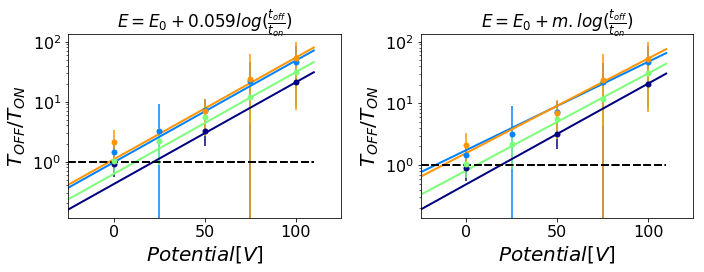

In [20]:
folder=r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160910_CuAzu655Ferri_asc_2ndtime/S83d10Sept16_CuAz655_0.1mMAsc_0.2mMFerri_0.11uW_A3/30sec_trace'
# E0_list, E0_m_list = Mid_potentials_slopem(folderpath=folder, pointnumbers=range(5), plotting=True, min_pot=0, min_pot_num=1)
E0_list, E0_m_list = Mid_potentials_slopem(folderpath=folder, pointnumbers=range(5),
                          process='cp', plotting=True,
                          min_pot=40, min_pot_num=1)

### lm_fit

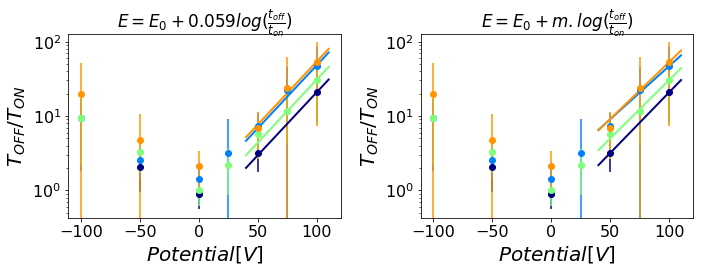

In [28]:
folder=r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160910_CuAzu655Ferri_asc_2ndtime/S83d10Sept16_CuAz655_0.1mMAsc_0.2mMFerri_0.11uW_A3/30sec_trace'
# E0_list, E0_m_list = Mid_potentials_slopem(folderpath=folder, pointnumbers=range(5), plotting=True, min_pot=0, min_pot_num=1)
E0_list, E0_m_list = Mid_potentials_slopem_lmfit(folderpath=folder, pointnumbers=range(5),
                                                 process='cp', plotting=True,
                                                 min_pot=40, min_pot_num=1)

## Histogram of E0

In [39]:
#list of folders and their directories CuAZUATTO655
S81d7Sept16_A3_ON_60sec_trace = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160907_CuAzu655_Ferri_Asc_analysis/S81d7Sept16_0.11uW_0.2mMFerri_0.1mM Asc_A3_ON/60sec_trace';
S81d7Sept16_A5_ON = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160907_CuAzu655_Ferri_Asc_analysis/S81d7Sept16_0.11uW_0.2mMFerri_0.1mM Asc_A5_ON';
S83d10Sept16_A3_30sec_trace = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160910_CuAzu655Ferri_asc_2ndtime/S83d10Sept16_CuAz655_0.1mMAsc_0.2mMFerri_0.11uW_A3/30sec_trace'
S101d14Feb17_60o5_635_A2_CuAzu655= r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S101d14Feb17_60.5_635_A2_CuAzu655';
S101d15Feb17_60o5_635_A2_CuAzu655= r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S101d15Feb17_60.5_635_A2_CuAzu655';
S101d15Feb17_62o2_635_A2_CuAzu655_2nd= r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S101d15Feb17_62.2_635_A2_CuAzu655_2nd';
S101d16Feb17_60o5_635_A3_CuAzu655= r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S101d16Feb17_60.5_635_A3_CuAzu655';
S104d20Feb17_60o5_635_A1_CuAzu655= r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S104d20Feb17_60.5_635_A1_CuAzu655';
S104d21Feb17_60o5_635_A1_CuAzu655= r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S104d21Feb17_60.5_635_A1_CuAzu655';
S104d21Feb17_60o5_635_A2_CuAzu655= r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S104d21Feb17_60.5_635_A2_CuAzu655';
#Combine all folders
allfolders = [S81d7Sept16_A3_ON_60sec_trace, S81d7Sept16_A5_ON,S83d10Sept16_A3_30sec_trace , S101d14Feb17_60o5_635_A2_CuAzu655, S101d15Feb17_60o5_635_A2_CuAzu655, S101d15Feb17_62o2_635_A2_CuAzu655_2nd, S101d16Feb17_60o5_635_A3_CuAzu655,
             S104d20Feb17_60o5_635_A1_CuAzu655, S104d21Feb17_60o5_635_A1_CuAzu655, S104d21Feb17_60o5_635_A2_CuAzu655]
#Calculate midpoint potential of all points in all folders
E0_array = pd.DataFrame(index=None, columns=['Point number', 'E0_fit', 'E0_err'])
E0_m_array = pd.DataFrame(index=None, columns=['Point number', 'E0_fit', 'E0_err', 'slope', 'slope_error'])
for folder in allfolders:
    E0_list, E0_m_list = Mid_potentials_slopem(folderpath=folder, pointnumbers=range(50),
                              process='cp', plotting=False,
                              min_pot=25, min_pot_num=1)    
    E0_array = E0_array.append(E0_list, ignore_index=True)
    E0_m_array = E0_m_array.append(E0_m_list, ignore_index=True)

()

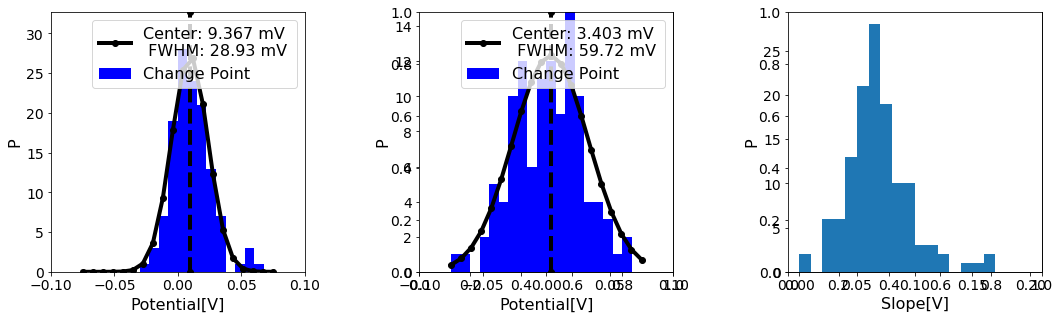

In [42]:
#MIDPOTENTIAL HISTGRAM FITTING
def plot_midpoint_hist(E0_array, E0_m_array):
    # Figure parameters
    fig = plt.figure(figsize=(15, 5))
    nrows=1; ncols=3;
    ax00 = plt.subplot2grid((nrows, ncols), (0,0))
    ax01 = plt.subplot2grid((nrows, ncols), (0,1))
    ax02 = plt.subplot2grid((nrows, ncols), (0,2))
    mpl.rcParams["font.family"] = "sans-serif"
    mpl.rcParams["font.size"] = "14"
    min_range = -0.075
    max_range = 0.075
    range_fit = [min_range, max_range]
    bins = 20
    bin_centers_on = linspace(range_fit[0], range_fit[1], bins)
    x=linspace(range_fit[0], range_fit[1], 100)# for a smooth fitting plot include more points

    from scipy.interpolate import interp1d
    from lmfit.models import GaussianModel
    mod = GaussianModel()
    n,bins_on1,patches = ax00.hist(E0_array['E0_fit'], bins = bins, range=range_fit, color='b', label='Change Point')#E0_list from running all folder
    y=n; x=bin_centers_on;
    result1 = mod.fit(y, center=0.01, amplitude=10, sigma=0.02, x=x)
    temp =result1.best_values
    FWHM = 2*temp['sigma']*1000 #V
    cent = temp['center']*1000#eV
    amp = temp['amplitude']

    ax00.plot(x, result1.best_fit, '-ko', lw=4, label='Center: %.3f mV \n FWHM: %.2f mV' %(cent, FWHM))
    amp = temp['amplitude']
    height = 0.3989423*amp/max(1.e-15, temp['sigma'])
    ax00.plot([cent*0.001, cent*0.001], [0, height+0.2*height], '--ok', lw=4)

    ax00.set_xlim(-0.1, 0.1)
    ax00.set_ylim(0,height+0.2*height)
    ax00.set_ylabel('P', fontsize=16)
    ax00.set_xlabel('Potential[V]', fontsize=16)
    ax00.legend(fontsize=16)
    #-----
    ax01 = fig.add_subplot(1,3,2)
    n,bins_on1,patches = ax01.hist(E0_m_array['E0_fit'], bins = bins, range=range_fit, color='b', label='Change Point')#E0_list from running all folder

    y=n; x=bin_centers_on;
    result1 = mod.fit(y, center=0.01, amplitude=10, sigma=0.02, x=x)
    temp =result1.best_values
    FWHM = 2*temp['sigma']*1000 #V
    cent = temp['center']*1000#eV
    amp = temp['amplitude']

    ax01.plot(x, result1.best_fit, '-ko', lw=4, label='Center: %.3f mV \n FWHM: %.2f mV' %(cent, FWHM))
    amp = temp['amplitude']
    height = 0.3989423*amp/max(1.e-15, temp['sigma'])
    ax01.plot([cent*0.001, cent*0.001], [0, height+0.2*height], '--ok', lw=4)

    ax01.set_xlim(-0.1, 0.1)
    ax01.set_ylim(0,height+0.2*height)
    ax01.set_ylabel('P', fontsize=16)
    ax01.set_xlabel('Potential[V]', fontsize=16)
    ax01.legend(fontsize=16)
    #-----
    ax02 = fig.add_subplot(1,3,3)
    n,bins_on1,patches = ax02.hist(E0_m_array['slope'], bins = 20, range=(0, 0.2))#, range=range_fit, color='b', label='Change Point'
    ax02.set_ylabel('P', fontsize=16)
    ax02.set_xlabel('Slope[V]', fontsize=16)
    # ax02.legend(fontsize=16)

    fig.tight_layout()
    return()
plot_midpoint_hist(E0_array, E0_m_array)

## 2D histogram

### all molecules

Number of on events: 17501
Number of off events: 17491


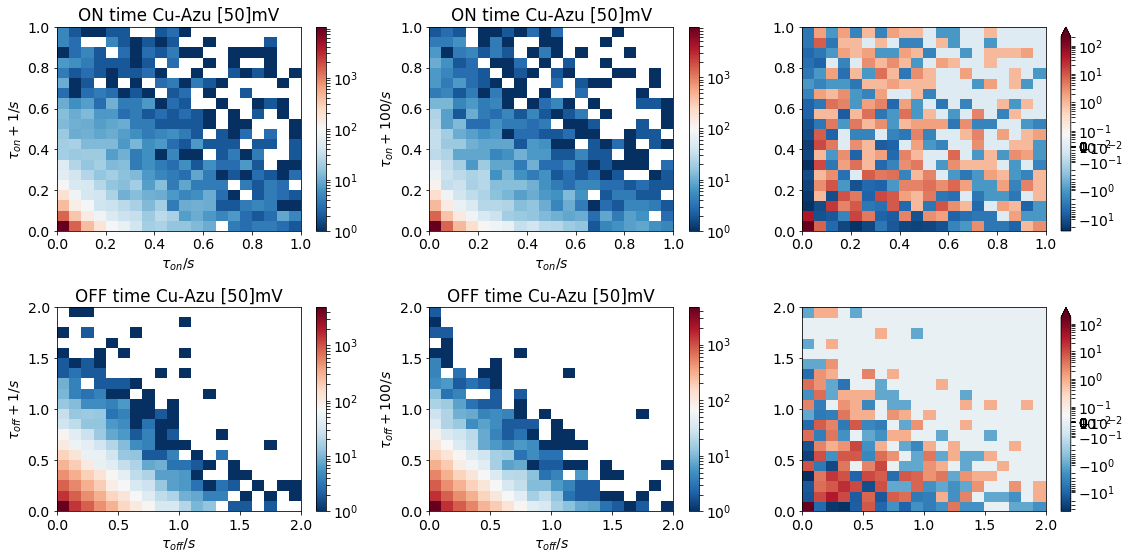

In [41]:
C_on_diff, C_off_diff = hist2D_on_off(foldername=S105d15May17_60o5_635_A1_CuAzu655_longtime, input_potential=[50], pointnumbers=range(50), bins_on=20, range_on=[0, 1], bins_off=20, range_off=[0, 2], x_shift=100, plots=True)

# Inter photon time

In [161]:
Point_12_75mV_S106_hdf5 = '/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/S106d18May17_635_CuAzu655_longtime/S106d18May17_60.5_635_A8_CuAzu655_075mV(12).pt3/data/Point_A7_075mV(12)_60.5_420s_12.hdf5'
file_path_hdf5 = Point_12_75mV_S106_hdf5
file_path_datn = file_path_hdf5[:-4] + 'pt3.datn'
df_datn = pd.read_csv(file_path_datn, header=None)
tmin = min(df_datn[0])
tmax = max(df_datn[0])
h5 = h5py.File(file_path_hdf5)
unit = h5['photon_data']['timestamps_specs']['timestamps_unit'][...]
tcspc_unit = h5['photon_data']['nanotimes_specs']['tcspc_unit'][...]
timestamps = unit * h5['photon_data']['timestamps'][...]
nanotimes = tcspc_unit * h5['photon_data']['nanotimes'][...]
mask = np.logical_and(timestamps >= tmin, timestamps <= tmax)
timestamps = timestamps[mask]
nanotimes = nanotimes[mask]

In [164]:
%run longtrace_stat.py
save_folder = '/home/biswajit/Downloads/temp/longtraces'
out = longtrace_byparts(timestamps, nanotimes,save_folder,
                  window=1e5, period=1e5, plotting=False)
[df_ts, df_lt, df_fcs, df_ip] = out

In [5]:
def photonhdf5_longtrace_byparts(file_path_hdf5, delete_oldpng=True):
    file_path_datn = file_path_hdf5[:-4] + 'pt3.datn'
    df_datn = pd.read_csv(file_path_datn, header=None)
    tmin = min(df_datn[0])
    tmax = max(df_datn[0])
    h5 = h5py.File(file_path_hdf5)
    unit = h5['photon_data']['timestamps_specs']['timestamps_unit'][...]
    tcspc_unit = h5['photon_data']['nanotimes_specs']['tcspc_unit'][...]
    timestamps = unit * h5['photon_data']['timestamps'][...]
    nanotimes = tcspc_unit * h5['photon_data']['nanotimes'][...]
    mask = np.logical_and(timestamps >= tmin, timestamps <= tmax)
    timestamps = timestamps[mask]
    nanotimes = nanotimes[mask]
    h5.close()
    hdf5file_name = os.path.basename(file_path_hdf5)
    longtraces_folder = '/home/biswajit/Downloads/temp/longtraces'
    save_folder = os.path.join(longtraces_folder, hdf5file_name[:-5])
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
    if delete_oldpng:
        filelist = [f for f in os.listdir(save_folder) if f.endswith(".png")]
        for f in filelist:
            os.remove(os.path.join(save_folder, f))
    out = longtrace_byparts(timestamps, nanotimes, save_folder,
                        window=1e5, period=1e5, plotting=True)
    return out
# photonhdf5_longtrace_byparts(file_path_hdf5)

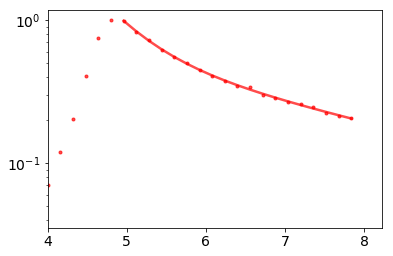

In [202]:
%run lifetime_fit.py
# plt.plot(df_lt.iloc[:,0], df_lt.iloc[:,1])
time_ns = df_lt.iloc[:,0].values
decay_hist = df_lt.iloc[:,1].values
out = lifetime_fitail(time_ns, decay_hist, offset=4.6, model='biexp')
# offset = time_ns[decay_hist == max(decay_hist)][-1]
# offset
[fit_res, time_ns_tail, decay_hist_tail] = out
params = fit_res.params;
decay_fit =biexp_lifetime(time_ns_tail, **{k: v.value for k, v in params.items()})
plt.plot(time_ns_tail, decay_fit,
          color='r', lw=2.5, alpha=0.7)
plt.plot(time_ns, decay_hist,
          '.r', lw=2.5, alpha=0.7)
plt.xlim(4, None)
plt.yscale('log')

# Remove files

In [6]:
def remove_file_extension(folderpath, ext_str = ['.offfit']):
    for dirpath, dirname, filenames in os.walk(folderpath):
        for filename in [f for f in filenames if f.endswith(tuple(ext_str))]:
            file_path = os.path.join(dirpath, filename)
            os.remove(file_path)
            print(file_path)
    return
# remove list: '.offfit', '.onfit', '.pt3.dt', '.pars', '.em.dt',
# '.em.2','.em.3','.em.4','.em.5', '.cp', '.cp0','.bic','.ah', '.ah.plot','.binned.plot','.pt3.dat', '.onoff.hist'
# DANGER_path = '/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data'
# remove_file_extension(DANGER_path,  ext_str = ['FCS2.dat'])